In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [91]:
df = pd.read_csv("Airlines.csv")

In [92]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [93]:
df.shape

(539383, 9)

In [94]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

No null data.. all data is good and can be used

# EDA

Identify the correlation among the variables

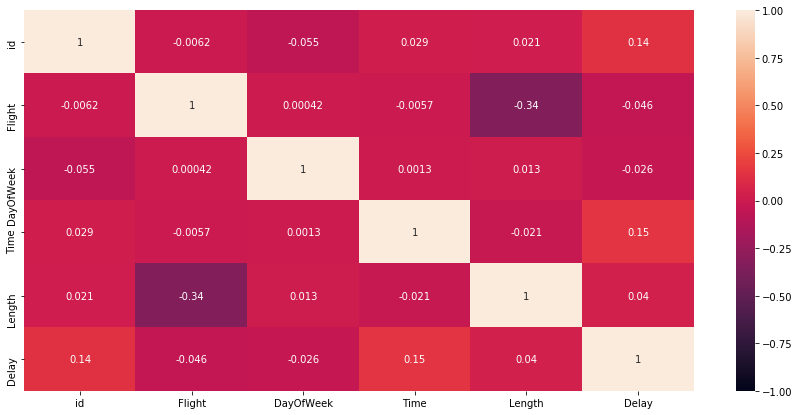

In [95]:
plt.figure(figsize = (15,7))
heatmap = sns.heatmap(df.corr(), vmin =-1, vmax = 1, annot = True)


[Text(0.5, 1.0, 'Delay')]

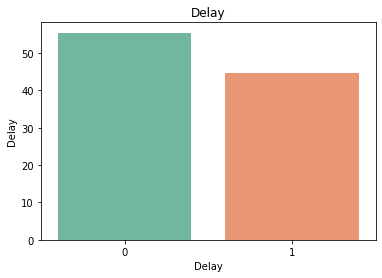

In [98]:
#sns.countplot(x='Delay',data = df)

sns.barplot(x="Delay", y="Delay", data=df, estimator=lambda x: len(x) / len(df) * 100, palette = "Set2").set(title = "Delay")

55% of the given flight details shows delayed arrival

In [99]:
len(df["Flight"].unique())

6585

In [100]:
len(df["Airline"].unique())


18

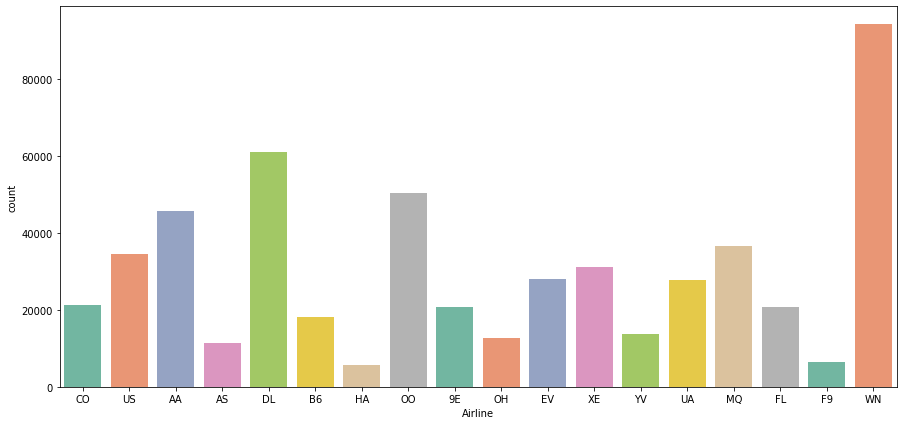

In [101]:
plt.figure(figsize = (15,7))
sns.countplot(x='Airline' ,data = df,palette = "Set2")


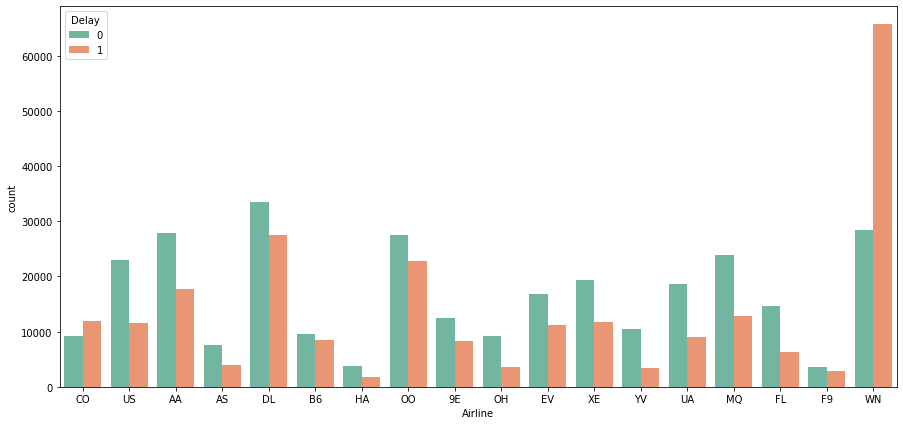

In [102]:
plt.figure(figsize = (15,7))
sns.countplot(x='Airline',hue ="Delay" ,data = df,palette = "Set2")


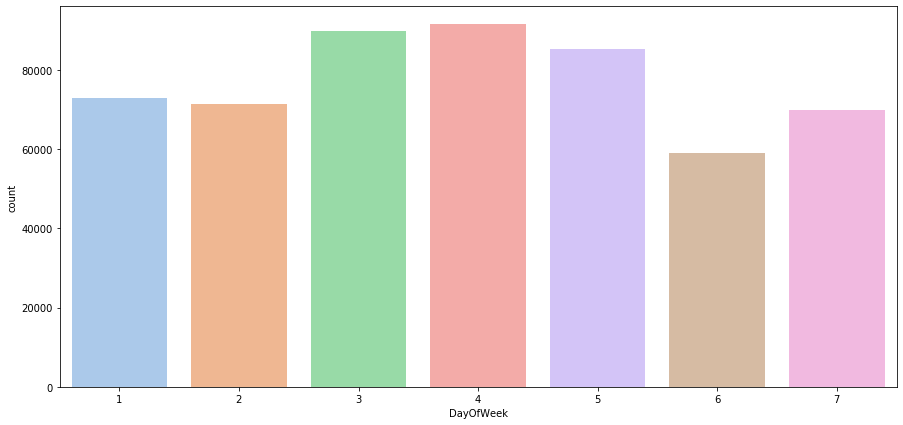

In [103]:
plt.figure(figsize = (15,7))
sns.countplot(x='DayOfWeek' ,data = df, palette = "pastel")

There seems to be more flights on mid of the week

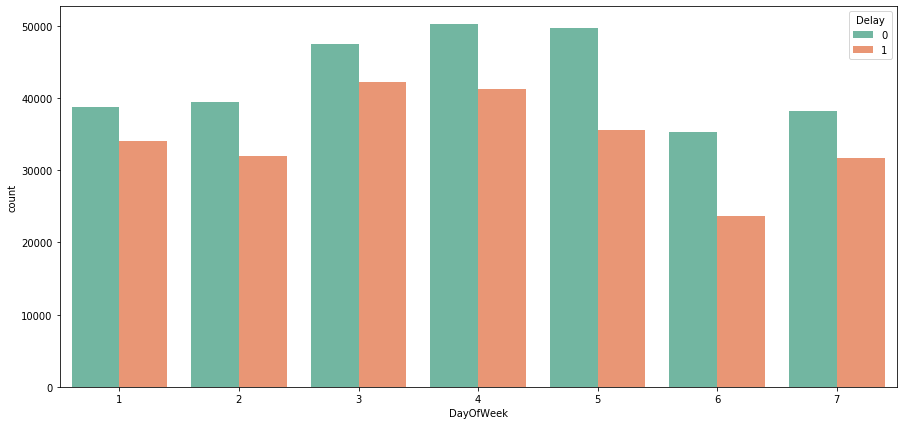

In [104]:
plt.figure(figsize = (15,7))
sns.countplot(x='DayOfWeek',hue ="Delay" ,data = df, palette = "Set2")

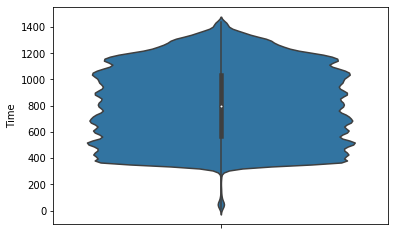

In [105]:
sns.violinplot(y='Time',data=df)

Time seems to be fairly normally distributed as well

In [106]:
pd.crosstab(df["Delay"],df["Airline"])

Airline,9E,AA,AS,B6,CO,DL,EV,F9,FL,HA,MQ,OH,OO,UA,US,WN,XE,YV
Delay,,,,,,,,,,,,,,,,,,
0,12460,27920,7579,9653,9161,33488,16728,3557,14552,3792,23863,9128,27494,18673,22909,28440,19331,10391
1,8226,17736,3892,8459,11957,27452,11255,2899,6275,1786,12742,3502,22760,8946,11591,65657,11795,3334


In [107]:
pd.crosstab(df['Delay'],df['Airline']).apply(lambda r: r/r.sum(), axis=0)

Airline,9E,AA,AS,B6,CO,DL,EV,F9,FL,HA,MQ,OH,OO,UA,US,WN,XE,YV
Delay,,,,,,,,,,,,,,,,,,
0,0.60234,0.61153,0.66071,0.532962,0.433801,0.549524,0.597792,0.55096,0.698708,0.679814,0.651905,0.722724,0.547101,0.676093,0.664029,0.302241,0.621056,0.757086
1,0.39766,0.38847,0.33929,0.467038,0.566199,0.450476,0.402208,0.44904,0.301292,0.320186,0.348095,0.277276,0.452899,0.323907,0.335971,0.697759,0.378944,0.242914


Airlines YV, OH,US, UA, XE,MQ,HA,FL,AS have significant no delays in the arrival.
However, airline WN is delayed 69% of times 

In [108]:
pd.crosstab(df['Delay'],df['DayOfWeek']).apply(lambda r: r/r.sum(), axis=0)

DayOfWeek,1,2,3,4,5,6,7
Delay,,,,,,,
0,0.532356,0.552663,0.529182,0.548975,0.583392,0.599447,0.546459
1,0.467644,0.447337,0.470818,0.451025,0.416608,0.400553,0.453541


Over the week there dnt be significant indication of delayed flights over ontime arrival

# Model Development

In [109]:
data = df.copy()

In [110]:
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [111]:
data.drop(["id","Flight","AirportFrom","AirportTo"], axis = 1, inplace = True)

In [112]:
airline = pd.get_dummies(df["Airline"])

In [113]:
data = pd.concat([data , airline], axis =1)

In [114]:
data.head()

,Airline,DayOfWeek,Time,Length,Delay,9E,AA,AS,B6,CO,...,FL,HA,MQ,OH,OO,UA,US,WN,XE,YV
0,CO,3,15,205,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,US,3,15,222,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,AA,3,20,165,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AA,3,20,195,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AS,3,30,202,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
data = data.drop(["Airline","DayOfWeek","Length"], axis = 1)

# Train test split 1 

Logistic Regression to estimate the delay with Airline, Time

In [116]:
X = data.drop("Delay", axis =1)

y = data["Delay"]

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [118]:
X

,Time,9E,AA,AS,B6,CO,DL,EV,F9,FL,HA,MQ,OH,OO,UA,US,WN,XE,YV
0,15,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539378,1439,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
539379,1439,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
539380,1439,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
539381,1439,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


# Logistic Regression

In [131]:
import sklearn.linear_model as lm

In [120]:
logmodel = lm.LogisticRegression()

In [121]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
X_train_pred = logmodel.predict(X_train)
training_data_acc = accuracy_score(y_train, X_train_pred)
print('Accuracy score of training data : ', training_data_acc)

Accuracy score of training data :  0.6307075811509449


The accuracy of the training data is 63% .. Given this, we continue with this model and maybe later use other variables to check if the accuracy is better

In [128]:
pred = logmodel.predict(X_test)
print("\033[1m Accuracy of Logistic Regression on test set:","{:.2%}".format(accuracy_score(y_test, pred)))
#accuracy_score(y_test, pred)

 Accuracy of Logistic Regression on test set: 63.22%


In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71     89680
           1       0.63      0.43      0.51     72135

    accuracy                           0.63    161815
   macro avg       0.63      0.61      0.61    161815
weighted avg       0.63      0.63      0.62    161815



In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[71296, 18384],
       [41127, 31008]], dtype=int64)

# Decision Tree

In [135]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier


In [133]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [134]:
y_pred = model.predict(X_test)
print("\033[1m Accuracy of Decision Tree Classifier on test set:","{:.2%}".format(accuracy_score(y_test, y_pred)))

 Accuracy of Decision Tree Classifier on test set: 64.47%


In [236]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71     98898
           1       0.63      0.48      0.55     79099

    accuracy                           0.64    177997
   macro avg       0.64      0.63      0.63    177997
weighted avg       0.64      0.64      0.64    177997



In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[70468, 19212],
       [38277, 33858]], dtype=int64)

# Random Forest Classification

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf= RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

In [ ]:
rf_pre=rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rf_pre))

In [ ]:
print(classification_report(y_test,rf_pre))

# Other method

In [84]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV

In [85]:
kfold = StratifiedKFold(n_splits=10, random_state=888)

C:\Users\abive\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [86]:
lr_model = LogisticRegressionCV(cv=kfold,class_weight='balanced',random_state=888)
lr_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced',
                     cv=StratifiedKFold(n_splits=10, random_state=888, shuffle=False),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=888, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

In [88]:
def print_eval_scores(model, X_train, y_train, cv):
    accuracy = cross_val_score(model, X_train, y_train, cv=cv,scoring='accuracy')

    print('Mean Accuracy: %s' % accuracy.mean())
    
print_eval_scores(lr_model, X_train, y_train, kfold)

Mean Accuracy: 0.6219435980931396


In [ ]:
lr_model.score(X_test,y_test)

In [231]:
y_pred_lr = lr_model.predict(X_test)

In [232]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67     89680
           1       0.58      0.55      0.57     72135

    accuracy                           0.62    161815
   macro avg       0.62      0.62      0.62    161815
weighted avg       0.62      0.62      0.62    161815



Text(0.5, 15.0, 'Predicted Label')

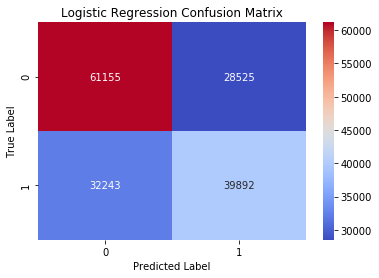

In [233]:
lr_cm = confusion_matrix(y_test,y_pred_lr)

ax = sns.heatmap(lr_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')

# Decision Tree